In [8]:
import numpy as np
import matplotlib.pyplot as plt

import os

In [9]:
results_path = "../sac/invisible_reward_runs/"

# in every subdir of results_path, there is a file called args.txt and if finished, training_stats.npz
all_args = []
all_stats = []
all_timestamps = []
for subdir in os.listdir(results_path):
    if os.path.isdir(os.path.join(results_path, subdir)):
        args_file = os.path.join(results_path, subdir, "args.txt")
        stats_file = os.path.join(results_path, subdir, "training_stats.npz")
        if os.path.exists(args_file) and os.path.exists(stats_file):
            with open(args_file, "r") as f:
                args = f.read()
            stats = np.load(stats_file)
            all_args.append(args)
            all_stats.append(stats)
            all_timestamps.append(subdir)

In [10]:
# filters = ["meister_maze.txt", "dqn"]
filters = ["ppo"]

Experiment 0: 2025-10-10-11-42
model: ppo
learning_rate: 0.001
weight_decay: 0.001
discount_factor: 0.99
exploration_rate: 1.0
optimistic_init: 0.0
exploration_decay: 0.995
num_episodes: 1000
num_steps: 1000000
batch_size: 64
target_update_frequency: 50
replay_buffer_size: 10000
burnin: 1000
gae_lambda: 0.95
update_epochs: 10
value_function_coef: 0.5
entropy_coef: 0.01
clip_coef: 0.2
max_grad_norm: 0.5
convolutional: True
test_frequency: 10
save_model_frequency: 10
visualisation_frequency: 10
map_name: meister_maze.txt
map_yaml_filename: test_meister_maze_shaped_2.yaml
test_map_yaml_filename: test_meister_maze_shaped_2.yaml
representation: pixel
episode_timeout: 200
results_dir: invisible_reward_runs



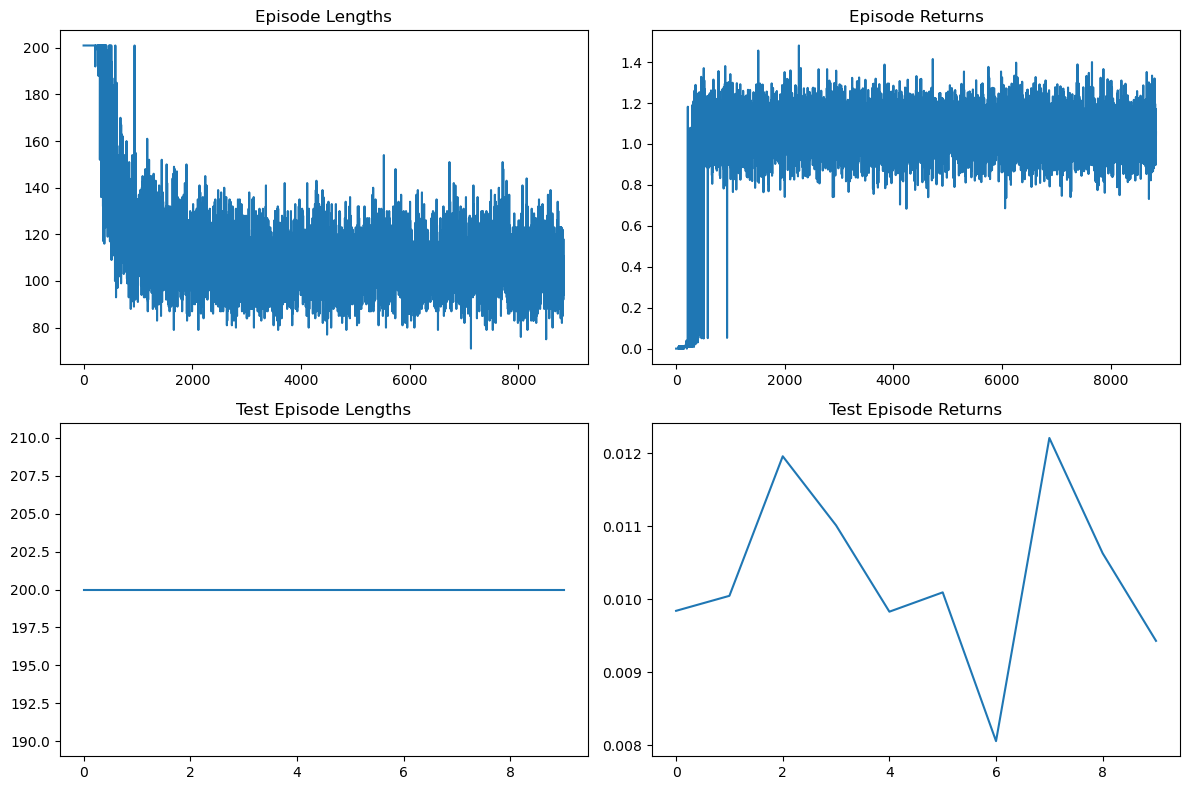

Experiment 1: 2025-10-10-11-41
model: ppo
learning_rate: 0.001
weight_decay: 0.001
discount_factor: 0.99
exploration_rate: 1.0
optimistic_init: 0.0
exploration_decay: 0.995
num_episodes: 1000
num_steps: 1000000
batch_size: 64
target_update_frequency: 50
replay_buffer_size: 10000
burnin: 1000
gae_lambda: 0.95
update_epochs: 10
value_function_coef: 0.5
entropy_coef: 0.1
clip_coef: 0.2
max_grad_norm: 0.5
convolutional: True
test_frequency: 10
save_model_frequency: 10
visualisation_frequency: 10
map_name: meister_maze.txt
map_yaml_filename: test_meister_maze_shaped_2.yaml
test_map_yaml_filename: test_meister_maze_shaped_2.yaml
representation: pixel
episode_timeout: 200
results_dir: invisible_reward_runs



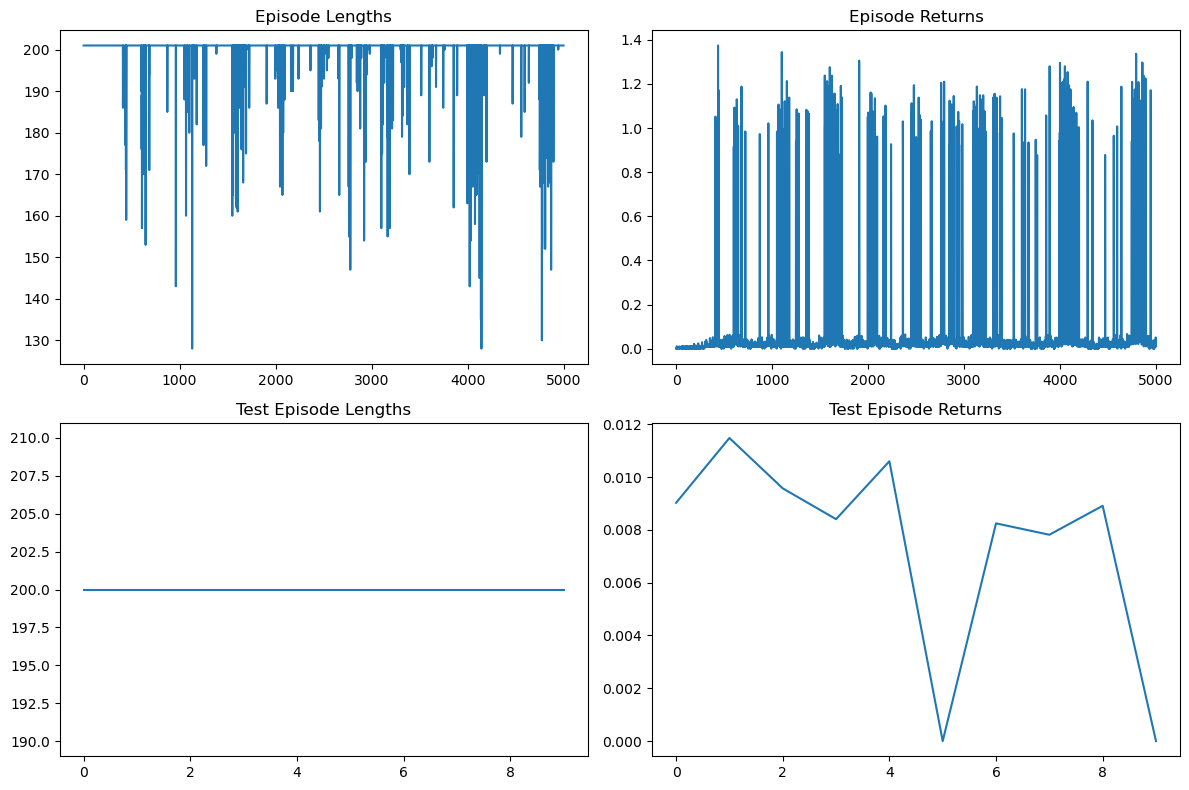

In [11]:
# keys episode_lengths, episode_rewards, test_episode_lengths, test_episode_rewards, episode_losses
for i in range(len(all_args)):
    if not all(f in all_args[i] for f in filters):
        continue
    print(f"Experiment {i}: {all_timestamps[i]}")
    print(all_args[i])
    perf_label = "returns" if "ppo" in all_args[i] else "rewards"
    stats = all_stats[i]
    plt.figure(figsize=(12, 8))
    plt.subplot(2, 2, 1)
    plt.plot(stats["episode_lengths"])
    plt.title("Episode Lengths")
    plt.subplot(2, 2, 2)
    plt.plot(stats[f"episode_{perf_label}"])
    plt.title(f"Episode {perf_label.capitalize()}")
    plt.subplot(2, 2, 3)
    plt.plot(stats["test_episode_lengths"])
    plt.title("Test Episode Lengths")
    plt.subplot(2, 2, 4)
    plt.plot(stats[f"test_episode_{perf_label}"])
    plt.title(f"Test Episode {perf_label.capitalize()}")
    plt.tight_layout()
    plt.show()